# Load Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [ ]:
totalClass = 8
shufflePixels = True
shuffleLabels = False

In [ ]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(40000, 32, 32, 3)
(40000, 32, 32, 3)
(40000, 8)
(8000, 32, 32, 3)
(8000, 8)


Populating the interactive namespace from numpy and matplotlib


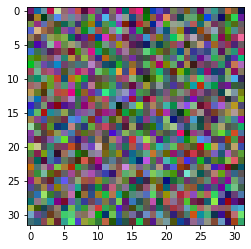

In [ ]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

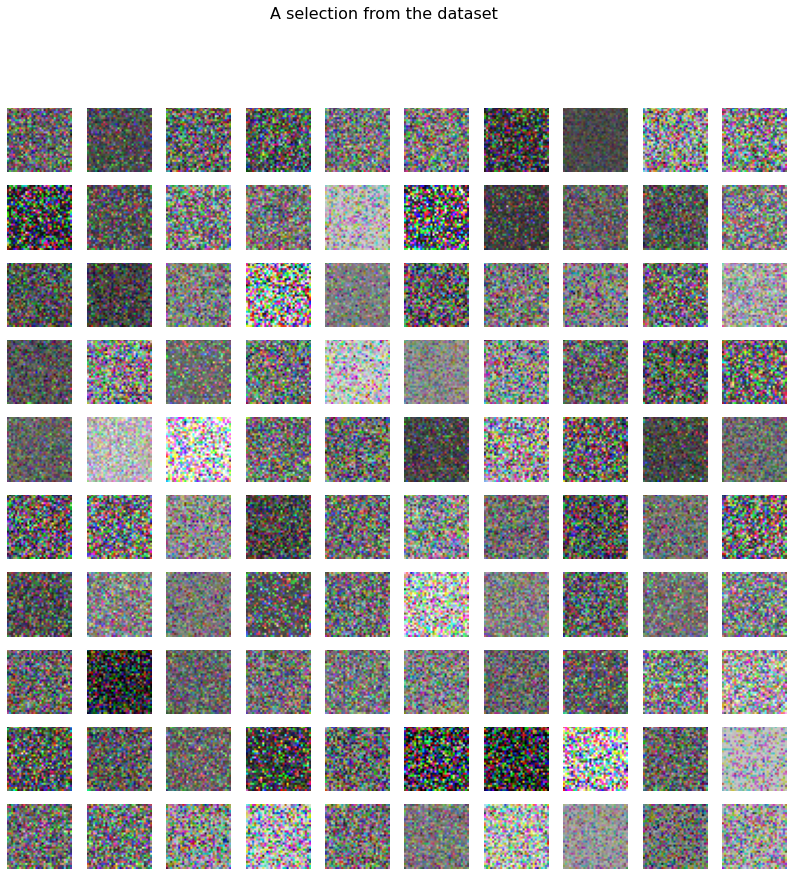

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [ ]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 11s 33ms/step - loss: 2.0875 - accuracy: 0.1250
test loss, test acc: [2.0874788761138916, 0.125]
Evaluate on test data
16/16 [==============================] - 1s 83ms/step - loss: 2.0877 - accuracy: 0.1250
test loss, test acc: [2.087665557861328, 0.125]


In [ ]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
400/400 [==============================] - 15s 32ms/step - loss: 2.0446 - accuracy: 0.1714 - val_loss: 2.0106 - val_accuracy: 0.1924
Epoch 2/250
400/400 [==============================] - 12s 30ms/step - loss: 2.0180 - accuracy: 0.1887 - val_loss: 1.9984 - val_accuracy: 0.1966
Epoch 3/250
400/400 [==============================] - 13s 32ms/step - loss: 2.0082 - accuracy: 0.1976 - val_loss: 1.9934 - val_accuracy: 0.2185
Epoch 4/250
400/400 [==============================] - 13s 32ms/step - loss: 2.0018 - accuracy: 0.2053 - val_loss: 1.9855 - val_accuracy: 0.2199
Epoch 5/250
400/400 [==============================] - 12s 30ms/step - loss: 1.9953 - accuracy: 0.2142 - val_loss: 1.9797 - val_accuracy: 0.2121
Epoch 6/250
400/400 [==============================] - 13s 32ms/step - loss: 1.9912 - accuracy: 0.2168 - val_loss: 1.9810 - val_accuracy: 0.2250
Epoch 7/250
400/400 [==============================] - 13s 32ms/step - loss: 1.9846 - accuracy: 0.2209 - val_loss: 1.9659 - val_ac

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 2s 31ms/step - loss: 0.0113 - accuracy: 0.9962
test loss, test acc: [0.011271844618022442, 0.9961749911308289]
Evaluate on test data
16/16 [==============================] - 1s 30ms/step - loss: 9.6222 - accuracy: 0.1569
test loss, test acc: [9.622223854064941, 0.15687499940395355]


# Small

In [ ]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 1s 7ms/step - loss: 32.0505 - accuracy: 0.1218
test loss, test acc: [32.05049133300781, 0.12184999883174896]
Evaluate on test data
16/16 [==============================] - 0s 12ms/step - loss: 32.3229 - accuracy: 0.1238
test loss, test acc: [32.322940826416016, 0.1237500011920929]


In [ ]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
400/400 [==============================] - 4s 8ms/step - loss: 4.7011 - accuracy: 0.1284 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/250
400/400 [==============================] - 3s 7ms/step - loss: 2.0803 - accuracy: 0.1275 - val_loss: 2.0794 - val_accuracy: 0.1254
Epoch 3/250
400/400 [==============================] - 3s 7ms/step - loss: 2.0796 - accuracy: 0.1299 - val_loss: 2.0794 - val_accuracy: 0.1252
Epoch 4/250
400/400 [==============================] - 3s 7ms/step - loss: 2.0779 - accuracy: 0.1438 - val_loss: 2.0790 - val_accuracy: 0.1280
Epoch 5/250
400/400 [==============================] - 3s 7ms/step - loss: 2.0749 - accuracy: 0.1518 - val_loss: 2.0793 - val_accuracy: 0.1268
Epoch 6/250
400/400 [==============================] - 3s 7ms/step - loss: 2.0732 - accuracy: 0.1503 - val_loss: 2.0795 - val_accuracy: 0.1277
Epoch 7/250
400/400 [==============================] - 3s 7ms/step - loss: 2.0699 - accuracy: 0.1560 - val_loss: 2.0766 - val_accuracy: 0.1398

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 1s 7ms/step - loss: 2.0561 - accuracy: 0.1960
test loss, test acc: [2.0561468601226807, 0.19599999487400055]
Evaluate on test data
16/16 [==============================] - 0s 7ms/step - loss: 2.1561 - accuracy: 0.1542
test loss, test acc: [2.1561429500579834, 0.15424999594688416]


#tNet

In [ ]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 4s 42ms/step - loss: 4.7304 - accuracy: 0.1250
test loss, test acc: [4.730371952056885, 0.12504999339580536]
Evaluate on test data
16/16 [==============================] - 1s 69ms/step - loss: 4.7635 - accuracy: 0.1249
test loss, test acc: [4.763528823852539, 0.12487500160932541]


In [ ]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
400/400 [==============================] - 18s 41ms/step - loss: 2.0993 - accuracy: 0.1920 - val_loss: 1.9789 - val_accuracy: 0.2339
Epoch 2/250
400/400 [==============================] - 16s 41ms/step - loss: 1.9567 - accuracy: 0.2403 - val_loss: 1.9760 - val_accuracy: 0.2196
Epoch 3/250
400/400 [==============================] - 16s 41ms/step - loss: 1.8780 - accuracy: 0.2788 - val_loss: 2.0086 - val_accuracy: 0.2201
Epoch 4/250
400/400 [==============================] - 16s 40ms/step - loss: 1.7579 - accuracy: 0.3365 - val_loss: 2.0614 - val_accuracy: 0.2090
Epoch 5/250
400/400 [==============================] - 16s 40ms/step - loss: 1.5765 - accuracy: 0.4209 - val_loss: 2.1873 - val_accuracy: 0.2007
Epoch 6/250
400/400 [==============================] - 16s 41ms/step - loss: 1.3540 - accuracy: 0.5194 - val_loss: 2.3646 - val_accuracy: 0.2045
Epoch 7/250
400/400 [==============================] - 16s 41ms/step - loss: 1.1055 - accuracy: 0.6211 - val_loss: 2.5637 - val_ac

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 3s 40ms/step - loss: 1.3157e-04 - accuracy: 0.9999
test loss, test acc: [0.00013156690692994744, 0.9999250173568726]
Evaluate on test data
16/16 [==============================] - 1s 39ms/step - loss: 6.3405 - accuracy: 0.1820
test loss, test acc: [6.340536117553711, 0.18199999630451202]


# ConvNet

In [ ]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 7s 51ms/step - loss: 3.4747 - accuracy: 0.1250
test loss, test acc: [3.474684476852417, 0.125]
Evaluate on test data
16/16 [==============================] - 2s 134ms/step - loss: 3.4838 - accuracy: 0.1250
test loss, test acc: [3.4838364124298096, 0.125]


In [22]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
400/400 [==============================] - 18s 41ms/step - loss: 2.0266 - accuracy: 0.1940 - val_loss: 1.9829 - val_accuracy: 0.2276
Epoch 2/250
400/400 [==============================] - 16s 40ms/step - loss: 1.9770 - accuracy: 0.2226 - val_loss: 1.9625 - val_accuracy: 0.2254
Epoch 3/250
400/400 [==============================] - 16s 39ms/step - loss: 1.9668 - accuracy: 0.2252 - val_loss: 1.9534 - val_accuracy: 0.2348
Epoch 4/250
400/400 [==============================] - 16s 39ms/step - loss: 1.9604 - accuracy: 0.2284 - val_loss: 1.9505 - val_accuracy: 0.2377
Epoch 5/250
400/400 [==============================] - 16s 40ms/step - loss: 1.9590 - accuracy: 0.2285 - val_loss: 1.9671 - val_accuracy: 0.2222
Epoch 6/250
400/400 [==============================] - 16s 39ms/step - loss: 1.9553 - accuracy: 0.2288 - val_loss: 1.9631 - val_accuracy: 0.2260
Epoch 7/250
400/400 [==============================] - 16s 40ms/step - loss: 1.9543 - accuracy: 0.2314 - val_loss: 1.9561 - val_ac

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 4s 49ms/step - loss: 0.0201 - accuracy: 0.9937
test loss, test acc: [0.020052146166563034, 0.9937499761581421]
Evaluate on test data
16/16 [==============================] - 1s 48ms/step - loss: 5.6683 - accuracy: 0.1891
test loss, test acc: [5.668276786804199, 0.18912500143051147]


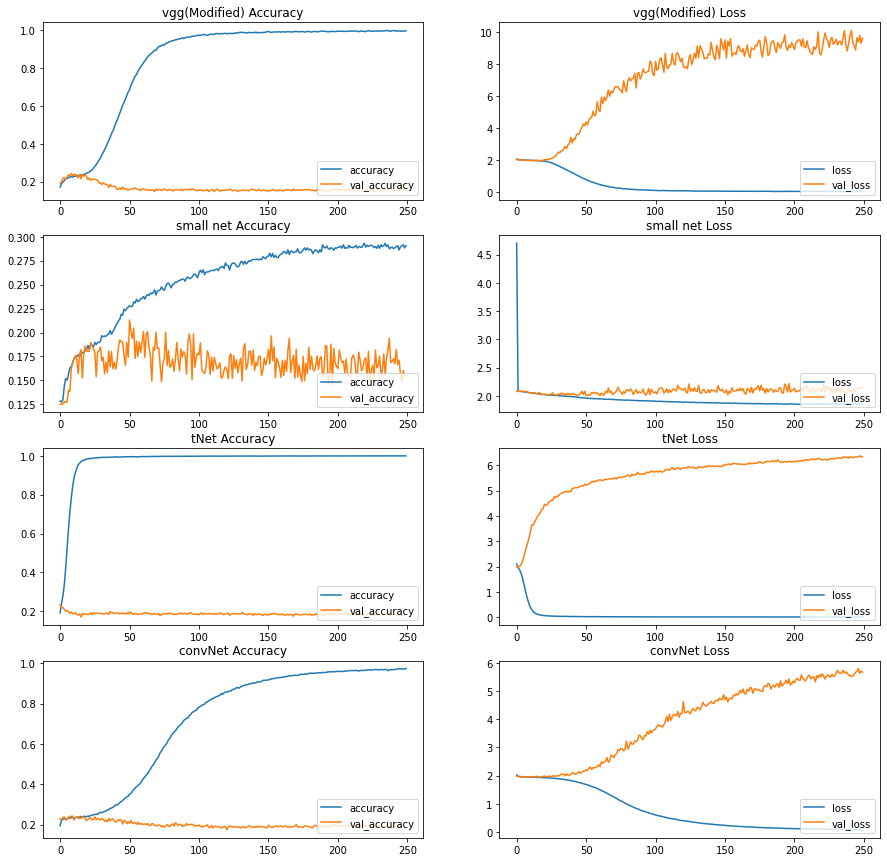

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
